# Import Dependencies

In [1]:
# Plotting Tools
%matplotlib inline
import matplotlib.pyplot as plt

# data preprocessing
import pandas as pd
import numpy as np
import re

# DF formatting options
pd.options.display.max_colwidth = 500

#### Load and explore raw data

In [2]:
raw_data = 'resources/mbti_1.csv'
df = pd.read_csv(raw_data)

In [3]:
df.head(5)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358..."
4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really hi...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


#### Group data to determine distribution of personality types

In [5]:
group_data = df.groupby('type').count()
group_data.sort_values('posts', ascending=False, inplace=True)
print('Personality Types', group_data.index.values)

Personality Types ['INFP' 'INFJ' 'INTP' 'INTJ' 'ENTP' 'ENFP' 'ISTP' 'ISFP' 'ENTJ' 'ISTJ'
 'ENFJ' 'ISFJ' 'ESTP' 'ESFP' 'ESFJ' 'ESTJ']


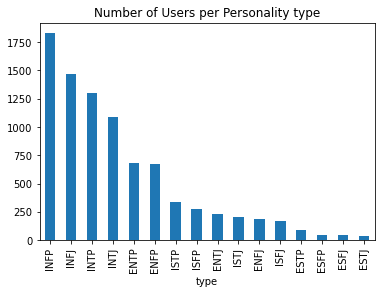

In [6]:
# Distribution of personality types
group_data["posts"].plot(kind="bar", title="Number of Users per Personality type");

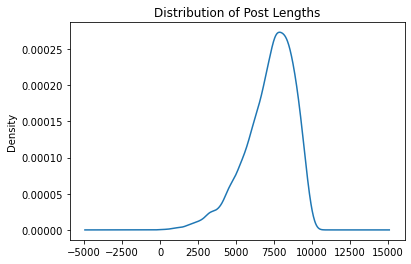

In [7]:
# Distribution of post character length
df['Length_Preprocessed'] = df['posts'].apply(len)
df['Length_Preprocessed'].plot.density().set_title('Distribution of Post Lengths');

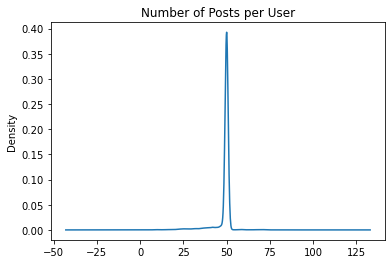

In [8]:
# Distribution of # of posts per user
df["NumPosts"] = df["posts"].apply(lambda x: len(x.split("|||")))
df['NumPosts'].plot.density().set_title('Number of Posts per User');

# Clean and preprocess data

#### define functions

In [9]:
# Split grouped posts into indiv. rows
def extract(posts, new_posts):
    for post in posts[1].split("|||"):
        new_posts.append((posts[0], post))

posts = []
df.apply(lambda x: extract(x, posts), axis=1)
print("Number of users", len(df))
print("Number of posts", len(posts))

df = pd.DataFrame(posts, columns=["type", "posts"])

Number of users 8675
Number of posts 422845


In [10]:
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg
2,INFJ,enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks
3,INFJ,What has been the most life-changing experience in your life?
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.
...,...,...
422840,INFP,"I was going to close my facebook a few months back, but as well as wanting to be able to message my family in ausse and school friends i found that i had connected a few other websites to it..."
422841,INFP,30 Seconds to Mars - All of my collections. It seems to be fitting my mood right now.
422842,INFP,"I have seen it, and i agree. I did actually think that the first time I watched the movie, and from the beginning (or when they got their powers) I kinda thought Andrew would never work right with..."
422843,INFP,"Ok so i have just watched Underworld 4 (Awakening) and must say it was a really good film, Compared to the other films out in the last few months anyway. I don't think it was as good as the first 3..."


In [11]:
def preprocess_text(df, remove_special=True):
    # Remove url links 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    
    # Maintain End of Line/string punctuation data
    # EOLdot = .
    # EOLqmark = ?
    # EOLex = !
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\.', ' EOLdot ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\?', ' EOLqmark ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'!', ' EOLex ', x + " "))
    
    # Strip misc Punctation
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^\w\s]','',x))

    # Remove Non-words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    # Remove multiple letter repating words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

    # Remove short/long words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{0,2})?\b','',x)) 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

    # Remove Personality Type identifiers/tokens, if post contains the following MBPT token identifiers, 
    # it is replaced with 'PtypeToken' to avoid bias when training model
    
    if remove_special:
        pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
        pers_types = [p.lower() for p in pers_types]
        p = re.compile("(" + "|".join(pers_types) + ")")

    df["posts"] = df["posts"].apply(lambda x: p.sub(' PtypeToken ',x))
    return df

In [12]:
# Preprocess Text
clean_data = preprocess_text(df) 

In [13]:
clean_data

,type,posts
0,INFJ,
1,INFJ,
2,INFJ,PtypeToken and PtypeToken moments sportscenter not top ten plays pranks
3,INFJ,What has been the most lifechanging experience your life EOLqmark
4,INFJ,repeat for most today EOLdot
...,...,...
422840,INFP,was going close facebook few months back but well wanting able message family ausse and school friends found that had connected few other websites EOLdot EOLdot EOLdot
422841,INFP,Seconds Mars All collections EOLdot seems fitting mood right now EOLdot
422842,INFP,have seen and agree EOLdot did actually think that the first time watched the movie and from the beginning when they got their powers kinda thought Andrew would never work right with EOLdot EOLdot EOLdot
422843,INFP,have just watched Underworld Awakening and must say was really good film Compared the other films out the last few months anyway EOLdot dont think was good the first EOLdot EOLdot EOLdot


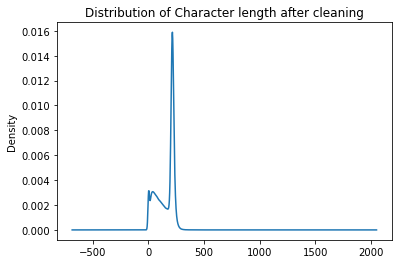

In [14]:
# Distribution of Character length after cleaning
clean_data["Len"] = clean_data["posts"].apply(len)
clean_data["Len"].plot.density().set_title('Distribution of Character length after cleaning');

In [15]:
# Remove posts with less than X words
min_words = 15
print("Number of posts", len(clean_data)) 
clean_data["nw"] = clean_data["posts"].apply(lambda x: len(re.findall(r'\w+', x)))
clean_data = clean_data[clean_data["nw"] >= min_words]
print("Number of posts", len(clean_data)) 

Number of posts 422845
Number of posts 299774


In [16]:
# Remove long post
max_length = 350
print("Number of posts", len(clean_data)) 
clean_data = clean_data[clean_data["Len"] < 350]
print("Number of posts", len(clean_data)) 

Number of posts 299774
Number of posts 299617


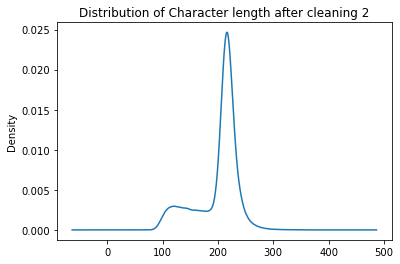

In [17]:
clean_data["Len"] = clean_data["posts"].apply(len)
clean_data["Len"].plot.density().set_title('Distribution of Character length after cleaning 2');

### Cleaned DataFrame

In [18]:
clean_df = pd.DataFrame(clean_data, columns=["type", "posts"])
clean_df

,type,posts
6,INFJ,The last thing INFJ friend posted his facebook before committing suicide the next day EOLdot Rest peace
7,INFJ,Hello ENFJ EOLdot Sorry hear your distress EOLdot Its only natural for relationship not perfection all the time every moment existence EOLdot Try figure the hard times times growth EOLdot EOLdot EOLdot
11,INFJ,Prozac wellbrutin least thirty minutes moving your legs and dont mean moving them while sitting your same desk chair weed moderation maybe try edibles healthier alternative EOLdot EOLdot EOLdot
12,INFJ,Basically come with three items youve determined that each type whichever types you want would more than likely use given each types cognitive functions and whatnot when left EOLdot EOLdot EOLdot
13,INFJ,All things moderation EOLdot Sims indeed video game and good one that EOLdot Note good one that somewhat subjective that not completely promoting the death any given Sim EOLdot EOLdot EOLdot
...,...,...
422839,INFP,Tonight sit outside window the blackness night staring out into the wilderness call space EOLdot Peace EOLdot Beauty EOLdot could stay here till the morning light EOLdot The thousands suns stare upon EOLdot EOLdot EOLdot
422840,INFP,was going close facebook few months back but well wanting able message family ausse and school friends found that had connected few other websites EOLdot EOLdot EOLdot
422842,INFP,have seen and agree EOLdot did actually think that the first time watched the movie and from the beginning when they got their powers kinda thought Andrew would never work right with EOLdot EOLdot EOLdot
422843,INFP,have just watched Underworld Awakening and must say was really good film Compared the other films out the last few months anyway EOLdot dont think was good the first EOLdot EOLdot EOLdot
